In [8]:
from os import walk
recpath = 'imagens_vq/teste'
recfiles = next(walk(recpath), (None, None, []))[2]

In [9]:
import csv
import numpy as np
allpoints = []

for i in range(0, len(recfiles)):
    file = open('./desempenhos/performance_' + str(i) + '.csv')
    p_df = csv.reader(file)
    points = []
    for row in p_df:
        points.append(row)
    points = np.array(points)
    points = points.astype(float)
    
    allpoints.append(points)

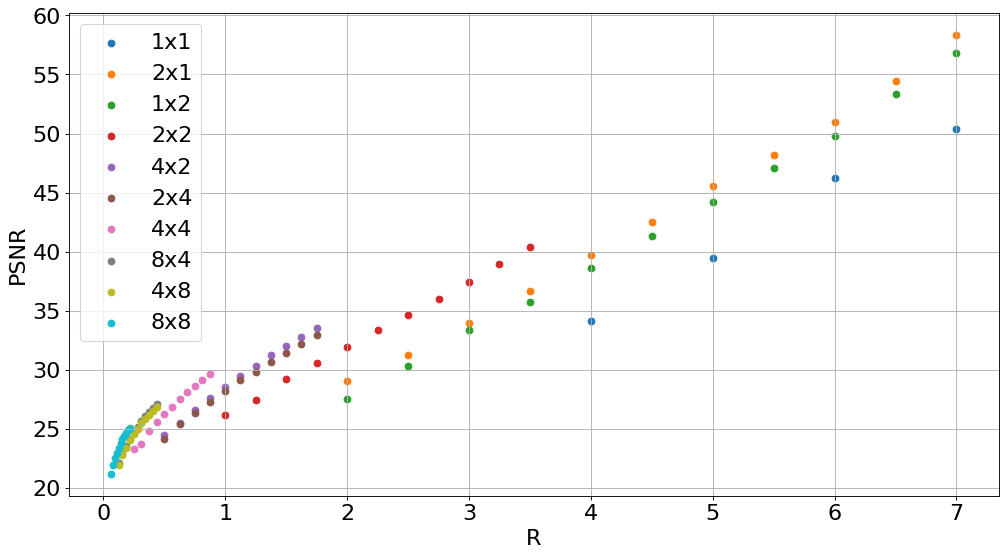

In [35]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
points = np.array(allpoints)
tamanhos = [1, 2, 1, 2, 4, 2, 4, 8, 4, 8]
tamanhos2 = [1, 1, 2, 2, 2, 4, 4, 4, 8, 8]
figure(figsize=(15, 8), dpi=80)
for i in range(0, 10):
    idxlist = (points[0, :, 0] == tamanhos[i]) * (points[0, :, 1] == tamanhos2[i])
    plt.scatter(np.mean(points[:, idxlist, 4], 0), np.mean(points[:, idxlist, 3], 0), label=str(int(points[0, idxlist, 0][0])) + "x" + str(int(points[0, idxlist, 1][0])))
    
    

plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel("R", fontsize=20)
plt.legend(fontsize=20)

plt.ylabel("PSNR", fontsize=20)
plt.grid()
# for i in range(0, len(points[0, :, 0])):
#     plt.text(points[0,i, 4],points[0,i, 3],  str(int(points[0,i, 0])) + '/' + str(int(points[0,i, 1])) + " C = " + str(int(points[0,i, 2])))
plt.savefig('performance.png')
plt.show()
